
# ![](logo-itd.png)

<div style = " Text-align: center">
    
# Analisis de Datos Masivos

## Visualizacion Avanzada de Datos

### Rodriguez Rivas Jose Gabriel

### Rubio Covarrubias Julio

</div>

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [3]:
query = 'SELECT * from average_speed'
df = pd.read_sql(query, conn)
df.head()

,index,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,0,E07000139,51.453604,21.106050,8.417493
1,1,E07000175,52.011513,20.999940,8.447744
2,2,E08000010,55.862332,23.244334,9.198047
3,3,E07000032,52.076669,21.105667,8.449855
4,4,E07000089,51.725676,20.956938,8.339789


In [4]:
df.drop('index', inplace=True, axis=1)
df.shape

(652, 4)

In [5]:
df.head()

,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,E07000139,51.453604,21.106050,8.417493
1,E07000175,52.011513,20.999940,8.447744
2,E08000010,55.862332,23.244334,9.198047
3,E07000032,52.076669,21.105667,8.449855
4,E07000089,51.725676,20.956938,8.339789


In [6]:
la_json = pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [7]:
df_promedio = df[['Area', 'Ping_promedio']]
df_promedio = df_promedio.rename(columns = {'Area':'LA_code'})
df_promedio.head()

,LA_code,Ping_promedio
0,E07000139,51.453604
1,E07000175,52.011513
2,E08000010,55.862332
3,E07000032,52.076669
4,E07000089,51.725676


In [9]:
print(df_promedio.Ping_promedio.min())
print(df_promedio.Ping_promedio.max())

0.0
70.19295547285596


In [11]:
bins = np.arange(df_promedio.Ping_promedio.min(), df_promedio.Ping_promedio.max(), 
                 (df_promedio.Ping_promedio.max()-df_promedio.Ping_promedio.min()) /6)
bins = list(bins)
print(bins)

[0.0, 11.69882591214266, 23.39765182428532, 35.09647773642798, 46.79530364857064, 58.4941295607133]


### Parte 2: Visualizar los Datos

In [13]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio, la_json,
                                               'LA_code',
                                              'Ping_promedio',
                                              bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

#### Nota
La generacion del mapa marca error debido a un dato mal registrado en la base de datos

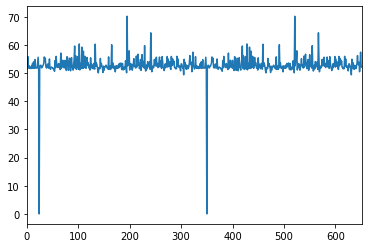

In [14]:
df_promedio.Ping_promedio.plot()

In [15]:
#Verificar datos que lleven el valor 0 
df_promedio[df_promedio.Ping_promedio==0]

,LA_code,Ping_promedio
24,DateTime,0.0
350,DateTime,0.0


In [16]:
#Eliminar datos que lleven 0
df_promedio.drop(24,inplace=True)
df_promedio.drop(350,inplace=True)

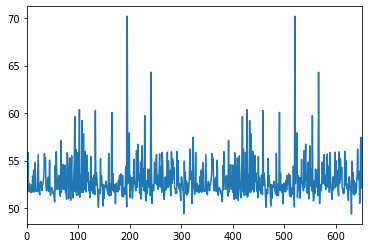

In [17]:
df_promedio.Ping_promedio.plot()

In [18]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio, la_json,
                                               'LA_code',
                                              'Ping_promedio',
                                              bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)